In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idf_df = pd.read_csv('transac_idf.csv')

In [3]:
idf_df.head()

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum,prix_m2,type_bat
0,10040024,2022-01-03,329910.0,75,112,PARIS 12,75012,260 AV DAUMESNIL,Appartement,False,...,{},{},{},0,0,0,0,0,10997.000000,1
1,10035062,2022-01-03,302400.0,75,102,PARIS 02,75002,52 RUE GRENETA,Appartement,False,...,{},{},{},0,0,0,0,0,11630.769231,1
2,10036657,2022-01-03,665000.0,75,117,PARIS 17,75017,26 BD DES BATIGNOLLES,Appartement,False,...,{},{},{},0,0,0,0,0,11271.186441,1
3,10035700,2022-01-03,965000.0,75,105,PARIS 05,75005,31 RUE CENSIER,Appartement,False,...,{},{},{},0,0,0,0,0,15317.460317,1
4,10029380,2022-01-03,200000.0,75,110,PARIS 10,75010,37 RUE DE PARADIS,Appartement,False,...,{},{},{},0,0,0,0,0,10526.315789,1


In [4]:
idf_df.shape

(118624, 27)

In [5]:
X = idf_df[['longitude', 'latitude']].values
y = idf_df['prix_m2'].values

In [6]:
X

array([[ 2.40375064, 48.83624849],
       [ 2.348148  , 48.86560434],
       [ 2.32468916, 48.88330859],
       ...,
       [ 2.21748065, 48.99549225],
       [ 2.3147687 , 48.97772502],
       [ 2.21243488, 49.0221078 ]])

In [7]:
y

array([10997.        , 11630.76923077, 11271.18644068, ...,
        2443.39622642,  6546.39175258,  2428.57142857])

<Axes: >

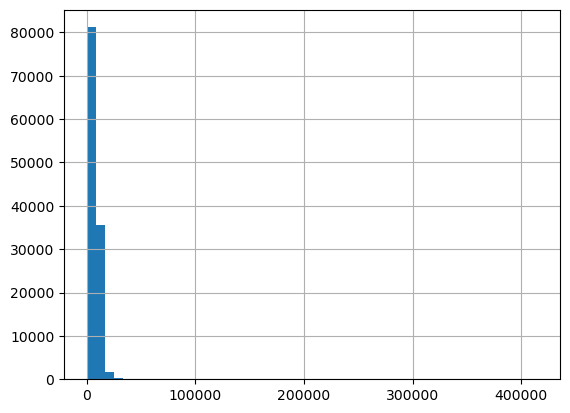

In [8]:
idf_df.prix_m2.hist(bins=50)

In [9]:
idf_df[idf_df.prix_m2 > 50000]

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum,prix_m2,type_bat
4743,10057507,2022-02-25,9200000.0,75,106,PARIS 06,75006,5 QUAI MALAQUAIS,Appartement,False,...,{},{},{},0,0,0,0,0,97872.340426,1
6935,10049450,2022-03-22,21500000.0,75,101,PARIS 01,75001,50 QUAI DES ORFEVRES,Appartement,False,...,{},{},{},0,0,0,0,0,82692.307692,1
7390,10031556,2022-03-28,8450000.0,75,108,PARIS 08,75008,35 RUE DU ROCHER,Appartement,False,...,{},{},{},0,0,0,0,0,338000.000000,1
8876,10071956,2022-04-12,1350000.0,75,106,PARIS 06,75006,12 RUE JACOB,Appartement,False,...,{},{},{},0,0,0,0,0,67500.000000,1
9392,10030795,2022-04-15,376000.0,75,107,PARIS 07,75007,3 RUE ROUSSELET,Appartement,False,...,{},{},{},0,0,0,0,0,53714.285714,1
9626,10028334,2022-04-20,10977400.0,75,108,PARIS 08,75008,85B RUE DU FAUBOURG SAINT HONORE,Appartement,False,...,{},{},{},0,0,0,0,0,51780.188679,1
17721,10048943,2022-07-05,352000.0,75,105,PARIS 05,75005,118 RUE MONGE,Appartement,False,...,{},{},{},0,0,0,0,0,50285.714286,1
19823,10038314,2022-07-22,14000000.0,75,106,PARIS 06,75006,34 RUE GUYNEMER,Appartement,False,...,{},{},{},0,0,0,0,0,62780.269058,1
31162,10036436,2022-11-23,3000000.0,75,112,PARIS 12,75012,11 RUE HECTOR MALOT,Appartement,False,...,{},{},{},0,0,0,0,0,50847.457627,1
67183,12586635,2022-02-18,415000.0,92,26,COURBEVOIE,92400,47 BD SAINT DENIS,Appartement,False,...,{},{},{},0,0,0,0,0,415000.000000,1


<Axes: >

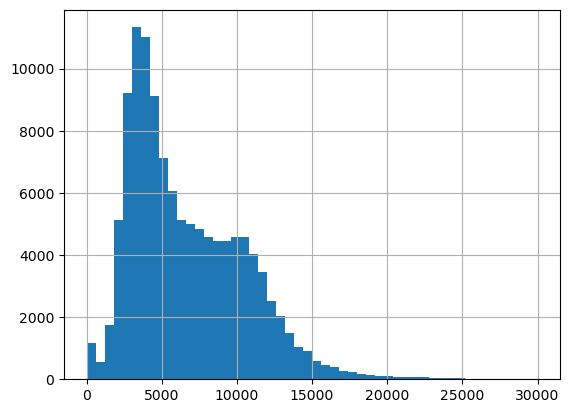

In [10]:
# Set the condition to filter rows
condition = idf_df['prix_m2'] > 30000

# Invert the condition to keep rows where 'prix_m2' is not greater than 30000
idf_df = idf_df[~condition]

idf_df.prix_m2.hist(bins=50)


In [11]:
# create the file .csv in notebooks without empty titles columns
idf_df.to_csv('transac_idf_cleaned.csv', index=False)

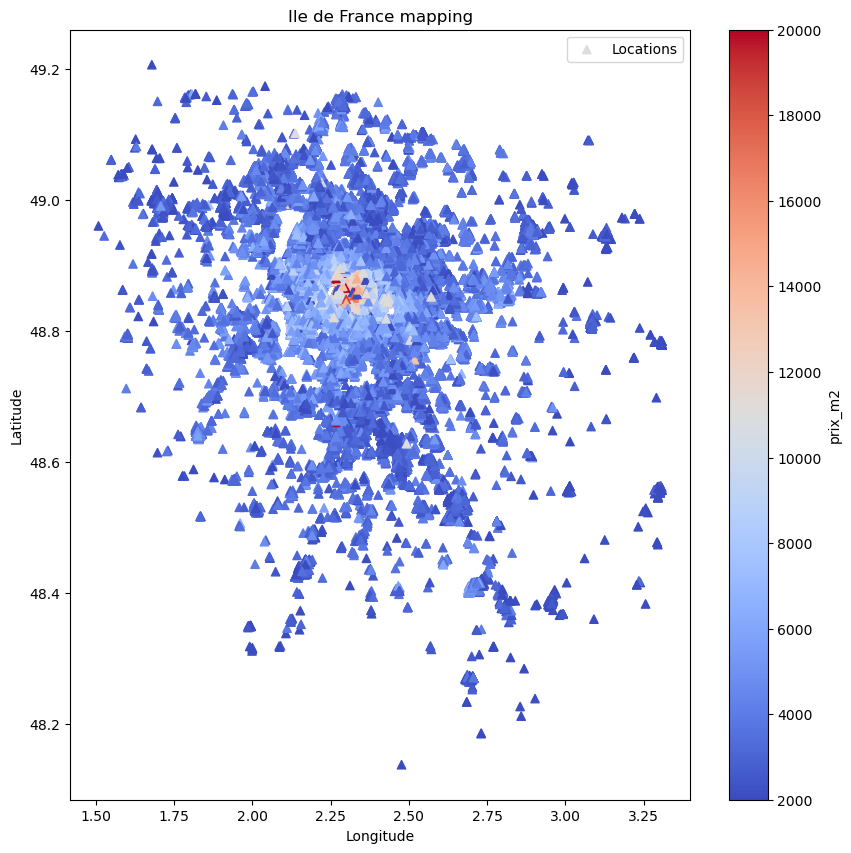

In [12]:
#create the mapping 
colors = np.array(idf_df['prix_m2'])
plt.figure(figsize=(10,10))

# Plotting the scatter plot with normalized and colorful markers
plt.scatter(idf_df['longitude'], idf_df['latitude'], c=colors, marker='^', label='Locations', cmap='coolwarm', vmin=2000, vmax=20000)

# Adding axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a title
plt.title('Ile de France mapping')

# Adding a colorbar
cbar = plt.colorbar()
cbar.set_label('prix_m2')

# Adding a legend if needed
plt.legend()

# Display the plot
plt.show()